In [1]:
import pandas as pd
import numpy as np
import csv
import scipy
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
caged = pd.read_csv(r'CAGEDEST_122018.txt', encoding = 'latin-1',delimiter=';')

In [3]:
caged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256752 entries, 0 to 2256751
Data columns (total 42 columns):
Admitidos/Desligados     int64
Competência Declarada    int64
Município                int64
Ano Declarado            int64
CBO 2002 Ocupação        int64
CNAE 1.0 Classe          int64
CNAE 2.0 Classe          int64
CNAE 2.0 Subclas         int64
Faixa Empr Início Jan    int64
Grau Instrução           int64
Qtd Hora Contrat         int64
IBGE Subsetor            int64
Idade                    int64
Ind Aprendiz             int64
Ind Portador Defic       int64
Raça Cor                 int64
Salário Mensal           object
Saldo Mov                int64
Sexo                     int64
Tempo Emprego            object
Tipo Estab               int64
Tipo Defic               int64
Tipo Mov Desagregado     int64
UF                       int64
Bairros SP               object
Bairros Fortaleza        object
Bairros RJ               object
Distritos SP             object
Regiões Adm D

In [4]:
caged['Salário Mensal'] = caged['Salário Mensal'].str.replace(',','.')

In [5]:
caged = caged.astype({'Salário Mensal': np.float64})

In [6]:
# retirando os salários nulos
caged_salario = caged.dropna(subset=['Salário Mensal'])

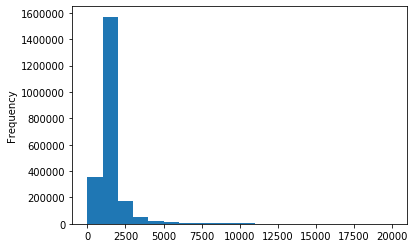

In [7]:
caged_salario['Salário Mensal'].plot.hist(bins=20,range=(0.1, 20000))

## Aqui era pra mostrar a curva, mas não funcionou

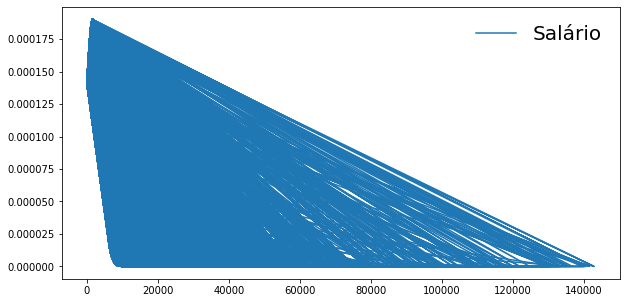

In [8]:
plt.rcParams['agg.path.chunksize'] = 10000 
fig, ax = plt.subplots(1, 1,figsize=(10,5))
# definindo os valores de x
x = caged_salario['Salário Mensal']
# calculando a média
mu = caged_salario['Salário Mensal'].mean()
# calculando o desvio padrão populacional
sigma = caged_salario['Salário Mensal'].std()#/len(df.salary)
# plotando o gráfico com os valores de x e os valores normais da densidade de probabilidade
ax.plot(x, stats.norm.pdf(x, mu, sigma),label='Salário')
# imprimindo a legenda
ax.legend(loc='best', frameon=False,fontsize = 20)
# mostrando o gráfico
plt.show()

In [9]:
# fazendo o teste de normalidade de shapiro
stats.shapiro(caged_salario['Salário Mensal'])

(0.2637892961502075, 0.0)

In [10]:
# aplicando o LOG na série de dados de salário e plotando uam distribuição
caged_salario['Salário Mensal'] = np.log(caged_salario['Salário Mensal'])

In [11]:
# retirando os salários não finitos
caged_salario = caged_salario[np.isfinite(caged_salario['Salário Mensal'])]

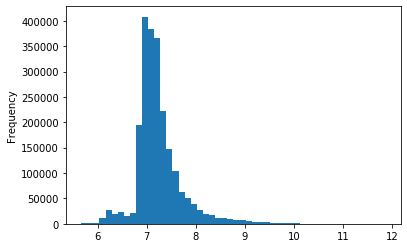

In [12]:
caged_salario['Salário Mensal'].plot.hist(bins=50)

In [13]:
# fazendo o teste de normalidade de shapiro
stats.shapiro(caged_salario['Salário Mensal'])

(0.8477897644042969, 0.0)

In [17]:
# subtrair a média e dividir pelo desvio-padrão)
caged_salario['Salário Mensal'] = ( caged_salario['Salário Mensal'] - caged_salario['Salário Mensal'].mean() ) / caged_salario['Salário Mensal'].std()


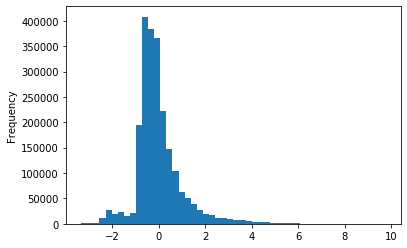

In [18]:
caged_salario['Salário Mensal'].plot.hist(bins=50)

In [19]:
# fazendo o teste de normalidade de shapiro
stats.shapiro(caged_salario['Salário Mensal'])

(0.859732449054718, 0.0)

In [20]:
# calculando o intervalo de confiança para os dados normalizados
# é esperado os valores de z_score
scipy.stats.norm.interval(alpha=0.95,loc=caged_salario['Salário Mensal'].mean(),scale=caged_salario['Salário Mensal'].std())

(-1.9599639845050982, 1.959963984578917)

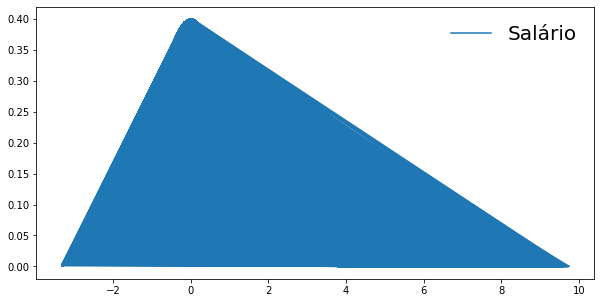

In [21]:
plt.rcParams['agg.path.chunksize'] = 10000 
fig, ax = plt.subplots(1, 1,figsize=(10,5))
# definindo os valores de x
x = caged_salario['Salário Mensal']
# calculando a média
mu = caged_salario['Salário Mensal'].mean()
# calculando o desvio padrão populacional
sigma = caged_salario['Salário Mensal'].std()#/len(df.salary)
# plotando o gráfico com os valores de x e os valores normais da densidade de probabilidade
ax.plot(x, stats.norm.pdf(x, mu, sigma),label='Salário')
# imprimindo a legenda
ax.legend(loc='best', frameon=False,fontsize = 20)
# mostrando o gráfico
plt.show()

## Idade

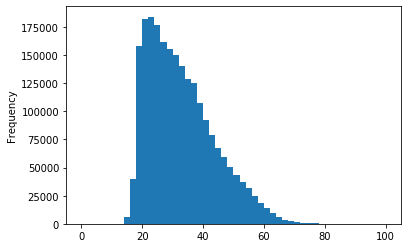

In [39]:
caged['Idade'].plot.hist(bins=50,range=(0, 100))

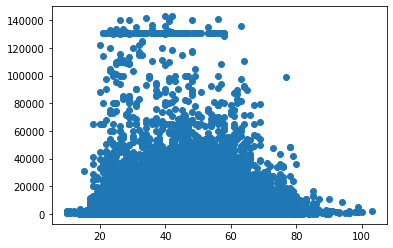

In [37]:
plt.scatter(x=caged['Idade'],y=caged['Salário Mensal'])

In [38]:
import scipy.stats

scipy.stats.pearsonr(caged['Idade'],y=caged['Salário Mensal'])

(0.15129436436275406, 0.0)

## Grau de instrução

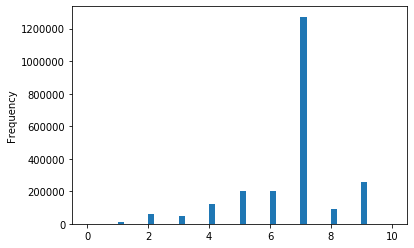

In [42]:
caged['Grau Instrução'].plot.hist(bins=50,range=(0, 10))

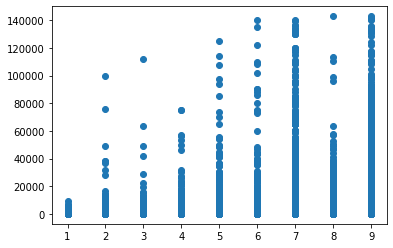

In [43]:
plt.scatter(x=caged['Grau Instrução'],y=caged['Salário Mensal'])

In [44]:
scipy.stats.pearsonr(caged['Grau Instrução'],y=caged['Salário Mensal'])

(0.18470180695812685, 0.0)

## Sexo

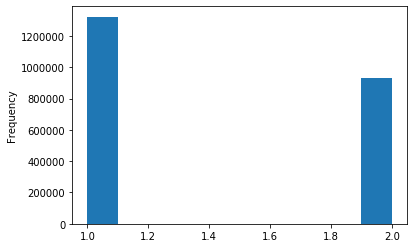

In [47]:
caged['Sexo'].plot.hist()

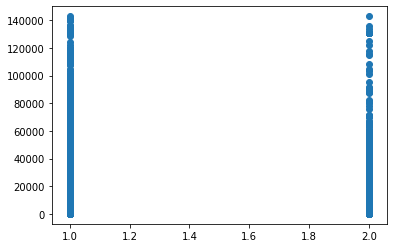

In [48]:
plt.scatter(x=caged['Sexo'],y=caged['Salário Mensal'])

## Raça Cor

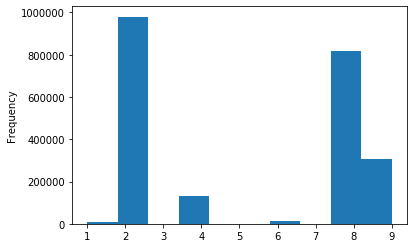

In [49]:
caged['Raça Cor'].plot.hist()

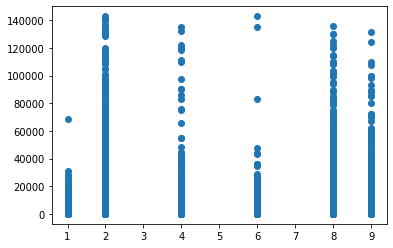

In [50]:
plt.scatter(x=caged['Raça Cor'],y=caged['Salário Mensal'])